## Шаг 1. Получение данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats as st 

In [2]:
try:
    calls = pd.read_csv('/datasets/calls.csv') # чтение файла с данными и сохранение в calls
    internet = pd.read_csv('/datasets/internet.csv') # чтение файла с данными и сохранение в internet
    messages = pd.read_csv('/datasets/messages.csv') # чтение файла с данными и сохранение в messages
    tariffs = pd.read_csv('/datasets/tariffs.csv') # чтение файла с данными и сохранение в tariffs
    users = pd.read_csv('/datasets/users.csv') # чтение файла с данными и сохранение в users
except FileNotFoundError:
    print('файл или директория не существует!')  

In [3]:
# функция получения информации
def get_info(name, df): 
    print('\033[1m' + 'Первые 5 строк таблицы: ' + name + '\033[0m')
    display(df.head())
    print()
    print('\033[1m' + 'Сводная информация о таблице: ' + name + '\033[0m')
    print()
    df.info()
    print()
    print('\033[1m' + 'Описательная статистика таблицы: ' + name + '\033[0m')
    display(df.describe())
    print()
    print('\033[1m' + 'Описательная статистика таблицы: ' + name + '\033[0m')
    display(df.describe(include=[object]))
    print()
    print('\033[1m' + 'Пропуски в таблице: ' + name + '\033[0m')
    report = df.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (100 * report['missing_values'] / df.shape[0]).round(2)
    display(report.sort_values(by = 'missing_values', ascending = False))
    print()
    print('\033[1m' + 'Дубликатов в таблице ' + name + '\033[0m'':', df.duplicated().sum())
    print()

In [4]:
# получаем информацию по таблицам
dict_df = {'Звонки': calls, 'Интернет': internet, 'Сообщения': messages, 'Тарифы': tariffs, 'Пользователи': users} 
for dfd in dict_df:
    get_info(dfd, dict_df[dfd])

Первые 5 строк таблицы: Звонки


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



Сводная информация о таблице: Звонки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Описательная статистика таблицы: Звонки


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000



Описательная статистика таблицы: Звонки


,id,call_date
count,202607,202607
unique,202607,365
top,1262_381,2018-12-31
freq,1,1435



Пропуски в таблице: Звонки


,missing_values,% of total
id,0,0.0
call_date,0,0.0
duration,0,0.0
user_id,0,0.0



Дубликатов в таблице Звонки: 0

Первые 5 строк таблицы: Интернет


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



Сводная информация о таблице: Интернет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Описательная статистика таблицы: Интернет


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000



Описательная статистика таблицы: Интернет


,id,session_date
count,149396,149396
unique,149396,365
top,1262_381,2018-12-31
freq,1,1057



Пропуски в таблице: Интернет


,missing_values,% of total
Unnamed: 0,0,0.0
id,0,0.0
mb_used,0,0.0
session_date,0,0.0
user_id,0,0.0



Дубликатов в таблице Интернет: 0

Первые 5 строк таблицы: Сообщения


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Сводная информация о таблице: Сообщения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Описательная статистика таблицы: Сообщения


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000



Описательная статистика таблицы: Сообщения


,id,message_date
count,123036,123036
unique,123036,364
top,1468_26,2018-12-31
freq,1,859



Пропуски в таблице: Сообщения


,missing_values,% of total
id,0,0.0
message_date,0,0.0
user_id,0,0.0



Дубликатов в таблице Сообщения: 0

Первые 5 строк таблицы: Тарифы


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Сводная информация о таблице: Тарифы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes

Описательная статистика таблицы: Тарифы


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000



Описательная статистика таблицы: Тарифы


,tariff_name
count,2
unique,2
top,ultra
freq,1



Пропуски в таблице: Тарифы


,missing_values,% of total
messages_included,0,0.0
mb_per_month_included,0,0.0
minutes_included,0,0.0
rub_monthly_fee,0,0.0
rub_per_gb,0,0.0
rub_per_message,0,0.0
rub_per_minute,0,0.0
tariff_name,0,0.0



Дубликатов в таблице Тарифы: 0

Первые 5 строк таблицы: Пользователи


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



Сводная информация о таблице: Пользователи

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Описательная статистика таблицы: Пользователи


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000



Описательная статистика таблицы: Пользователи


,churn_date,city,first_name,last_name,reg_date,tariff
count,38,500,500,500,500,500
unique,33,76,246,419,270,2
top,2018-10-14,Москва,Радим,Андреенко,2018-05-28,smart
freq,2,99,6,5,8,351



Пропуски в таблице: Пользователи


,missing_values,% of total
churn_date,462,92.4
user_id,0,0.0
age,0,0.0
city,0,0.0
first_name,0,0.0
last_name,0,0.0
reg_date,0,0.0
tariff,0,0.0



Дубликатов в таблице Пользователи: 0



In [5]:
print('Доля duration = 0 в данных calls:',calls.query('duration == 0')['duration'].count()/len(calls)) # вывод на экран долю 0 в данных
print('Доля mb_used = 0 в данных internet:',internet.query('mb_used == 0')['mb_used'].count()/len(internet)) # вывод на экран долю 0 в данных

Доля duration = 0 в данных calls: 0.19551644316336553
Доля mb_used = 0 в данных internet: 0.13118155773916304


### Вывод

При изучении файла выявлены ошибки:

- В таблице interne лишний столбец Unnamed: 0, удалим.
- В таблицах calls, internet, messages, users столбцы с датой тип object, преобразуем в datetime64.
- Доля duration = 0 в данных calls: 0.195 - пропущеные звонки.  
- Доля mb_used = 0 в данных internet: 0.131 - возможно попытки подключения к интернету не в зоне покрытия.  
- 0 в данных никак не влияют на финансовые показатели, строки с 0 в таблицах calls и internet удалим.

Перед анализом нужно предобработать данные.

## Шаг 2. Предобработка данных

In [6]:
calls=calls.query('duration>0') # удаляем строик где duration <= 0

In [7]:
calls['duration'] = np.ceil(calls['duration']) # округляем в болбшую сторону столбец duration
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') # преобразуем столбец call_date в datetime64
calls['month'] = calls['call_date'].dt.month_name() # создатём столбец month

In [8]:
calls_agg = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index() # группируем calls по user_id и month

In [9]:
internet=internet.query('mb_used>0') # удаляем строик где mb_used <= 0 

In [10]:
internet = internet.drop(columns = 'Unnamed: 0') # удаляем столбец Unnamed: 0

In [11]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d') # преобразуем столбец session_date в datetime64
internet['month'] = internet['session_date'].dt.month_name() # создатём столбец month

In [12]:
internet_agg = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index() # группируем internet по user_id и month

In [13]:
internet_agg['mb_used'] = np.ceil(internet_agg['mb_used']/1024) # пересчитываем мегабайты в гигабайты и округляем в большую сторону

In [14]:
internet_agg = internet_agg.rename(columns = {'mb_used':'gb_used'}) # переименовывапем столбец mb_used в gb_used

In [15]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d') # преобразуем столбец message_date в datetime64
messages['month'] = messages['message_date'].dt.month_name() # создатём столбец month

In [16]:
messages_agg = messages.groupby(['user_id', 'month']).agg({'message_date': 'count'}).reset_index() # группируем internet по user_id и month

In [17]:
messages_agg = messages_agg.rename(columns = {'message_date':'message'}) # переименовывапем столбец message_date в message

In [18]:
df = calls_agg.merge(internet_agg, on = ['user_id', 'month'], how = 'outer') # объединяем таблицы calls и internet и записываем в df

In [19]:
df = messages_agg.merge(df, on = ['user_id', 'month'], how = 'outer') # объединяем таблицы df и messages и записываем в df 

In [20]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included']/1024 # пересчитываем мегабайты в гигабайты

In [21]:
tariffs = tariffs.rename(columns = {'tariff_name':'tariff', 'mb_per_month_included':'gb_per_month_included'}) # переименовывапем столбец tariff_name в tariff, mb_per_month_included в gb_per_month_included 

In [22]:
users_tariffs = tariffs.merge(users, on = 'tariff', how = 'outer') # объединяем таблицы users и tariffs и записываем в users_tariffs 

In [23]:
df = users_tariffs.merge(df, on = 'user_id', how = 'outer') # объединяем таблицы users_tariffs и df и записываем в df

In [24]:
display(df.head(10)) # получение первых 10 строк таблицы df

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,age,churn_date,city,first_name,last_name,reg_date,month,message,duration,gb_used
0,50,15.0,500,550,200,3,3,smart,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,December,NaN,414.0,14.0
1,50,15.0,500,550,200,3,3,smart,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,November,NaN,430.0,18.0
2,50,15.0,500,550,200,3,3,smart,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,August,13.0,289.0,20.0
3,50,15.0,500,550,200,3,3,smart,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,December,12.0,236.0,18.0
4,50,15.0,500,550,200,3,3,smart,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,July,11.0,214.0,18.0
5,50,15.0,500,550,200,3,3,smart,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,June,4.0,117.0,11.0
6,50,15.0,500,550,200,3,3,smart,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,November,16.0,243.0,19.0
7,50,15.0,500,550,200,3,3,smart,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,October,10.0,212.0,14.0
8,50,15.0,500,550,200,3,3,smart,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,September,4.0,206.0,17.0
9,50,15.0,500,550,200,3,3,smart,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,April,41.0,712.0,10.0


In [25]:
df['over_duration'] = df['duration'] - df['minutes_included'] # создатём столбец over_duration превышение лимита длительности звонков
df['over_duration'] = df['over_duration'].where(df['over_duration'] > 0, 0) 
df['over_gb_used'] = df['gb_used'] - df['gb_per_month_included'] # создатём столбец over_gb_used превышение лимита интернет-трафика
df['over_gb_used'] = df['over_gb_used'].where(df['over_gb_used'] > 0, 0)
df['over_message'] = df['message'] - df['messages_included'] # создатём столбец over_message превышение лимита сообщений
df['over_message'] = df['over_message'].where(df['over_message'] > 0, 0)

In [26]:
df['revenue'] = df['rub_monthly_fee'] + df['over_duration'] * df['rub_per_minute'] + df['over_gb_used'] * df['rub_per_gb'] + df['over_message'] * df['rub_per_message'] # создатём столбец revenue  

In [27]:
display(df.head(10)) # получение первых 10 строк таблицы df

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,age,...,last_name,reg_date,month,message,duration,gb_used,over_duration,over_gb_used,over_message,revenue
0,50,15.0,500,550,200,3,3,smart,1001,41,...,Ежов,2018-11-01,December,NaN,414.0,14.0,0.0,0.0,0.0,550.0
1,50,15.0,500,550,200,3,3,smart,1001,41,...,Ежов,2018-11-01,November,NaN,430.0,18.0,0.0,3.0,0.0,1150.0
2,50,15.0,500,550,200,3,3,smart,1002,59,...,Абрамович,2018-06-17,August,13.0,289.0,20.0,0.0,5.0,0.0,1550.0
3,50,15.0,500,550,200,3,3,smart,1002,59,...,Абрамович,2018-06-17,December,12.0,236.0,18.0,0.0,3.0,0.0,1150.0
4,50,15.0,500,550,200,3,3,smart,1002,59,...,Абрамович,2018-06-17,July,11.0,214.0,18.0,0.0,3.0,0.0,1150.0
5,50,15.0,500,550,200,3,3,smart,1002,59,...,Абрамович,2018-06-17,June,4.0,117.0,11.0,0.0,0.0,0.0,550.0
6,50,15.0,500,550,200,3,3,smart,1002,59,...,Абрамович,2018-06-17,November,16.0,243.0,19.0,0.0,4.0,0.0,1350.0
7,50,15.0,500,550,200,3,3,smart,1002,59,...,Абрамович,2018-06-17,October,10.0,212.0,14.0,0.0,0.0,0.0,550.0
8,50,15.0,500,550,200,3,3,smart,1002,59,...,Абрамович,2018-06-17,September,4.0,206.0,17.0,0.0,2.0,0.0,950.0
9,50,15.0,500,550,200,3,3,smart,1005,67,...,Горлов,2018-01-25,April,41.0,712.0,10.0,212.0,0.0,0.0,1186.0


In [28]:
# пользователей в финальной таблице
df['user_id'].nunique()

500

In [29]:
# пользователей по таблицам отдельно
for table in [calls, internet, messages]:
    print(table['user_id'].nunique())

492
497
426


### Вывод

- Столбцы с датами приведены к типу datetime64. 
- Удален столбец Unnamed: 0.  
- Посчитаны для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам. 
- Все таблицы объединены в одну df. 
- Создан столбец revenue.

## Шаг 3. Анализ и описание данных

In [30]:
df.groupby('tariff').agg({'duration': ['mean', 'std', 'var']}) # группируем df по tariff и считаем среднее, стандартное отклонение и дисперсию столбца duration 

duration                          
              mean         std           var
tariff                                      
smart   419.440342  188.992403  35718.128534
ultra   547.755016  305.513385  93338.428291

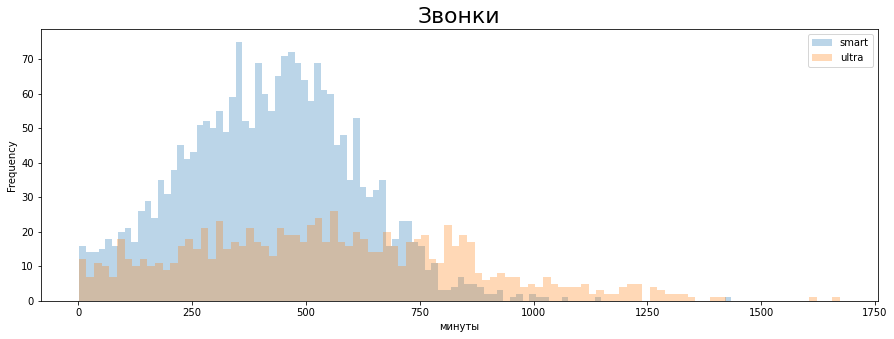

In [31]:
df.query('tariff == "smart"')['duration'].plot(kind = 'hist', bins = 100, figsize=(15,5), alpha=0.3, legend = True,  label = 'smart') # строим гистограмму duration тарифа smart 
df.query('tariff == "ultra"')['duration'].plot(kind = 'hist', bins = 100, figsize=(15,5), alpha=0.3, legend = True, label = 'ultra') # строим гистограмму duration тарифа ultra 
plt.title('Звонки', fontsize=22) # задаём название графика
plt.xlabel('минуты') # задаём подпись горизонтальной оси
plt.show() # показываем график

In [32]:
df.groupby('tariff').agg({'gb_used': ['mean', 'std', 'var']}) # группируем df по tariff и считаем среднее, стандартное отклонение и дисперсию столбца gb_used

gb_used                     
             mean       std        var
tariff                                
smart   16.343511  5.728752  32.818605
ultra   19.714579  9.687335  93.844453

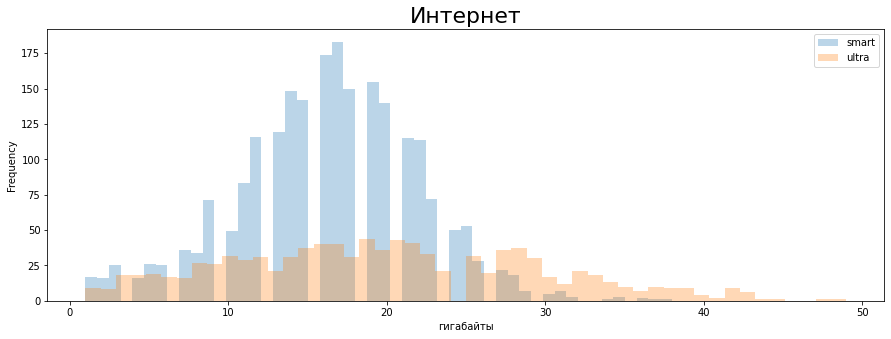

In [33]:
df.query('tariff == "smart"')['gb_used'].plot(kind = 'hist', bins = 50, figsize=(15,5), alpha=0.3, legend = True,  label = 'smart') # строим гистограмму gb_used тарифа smart 
df.query('tariff == "ultra"')['gb_used'].plot(kind = 'hist', bins = 50, figsize=(15,5), alpha=0.3, legend = True, label = 'ultra') # строим гистограмму gb_used тарифа ultra 
plt.title('Интернет', fontsize=22) # задаём название графика
plt.xlabel('гигабайты') # задаём подпись горизонтальной оси
plt.show() # показываем график

In [34]:
df.groupby('tariff').agg({'message': ['mean', 'std', 'var']}) # группируем df по tariff и считаем среднее, стандартное отклонение и дисперсию столбца message

message                        
             mean        std          var
tariff                                   
smart   38.716441  26.787949   717.594201
ultra   61.161006  45.931026  2109.659183

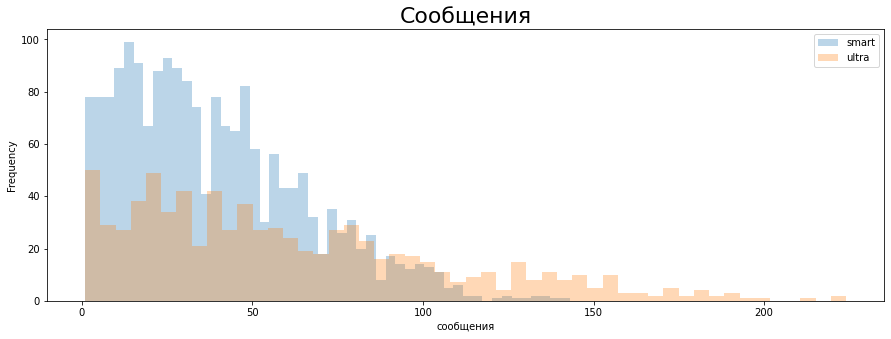

In [35]:
df.query('tariff == "smart"')['message'].plot(kind = 'hist', bins = 50, figsize=(15,5), alpha=0.3, legend = True,  label = 'smart') # строим гистограмму message тарифа smart 
df.query('tariff == "ultra"')['message'].plot(kind = 'hist', bins = 50, figsize=(15,5), alpha=0.3, legend = True, label = 'ultra') # строим гистограмму message тарифа ultra 
plt.title('Сообщения', fontsize=22) # задаём название графика
plt.xlabel('сообщения') # задаём подпись горизонтальной оси
plt.show() # показываем график

In [36]:
df.groupby('tariff').agg({'revenue': ['mean', 'std', 'var']}) # группируем df по tariff и считаем среднее, стандартное отклонение и дисперсию столбца revenue

revenue                           
               mean         std            var
tariff                                        
smart   1289.641704  818.370799  669730.763895
ultra   2070.030426  376.015578  141387.714809

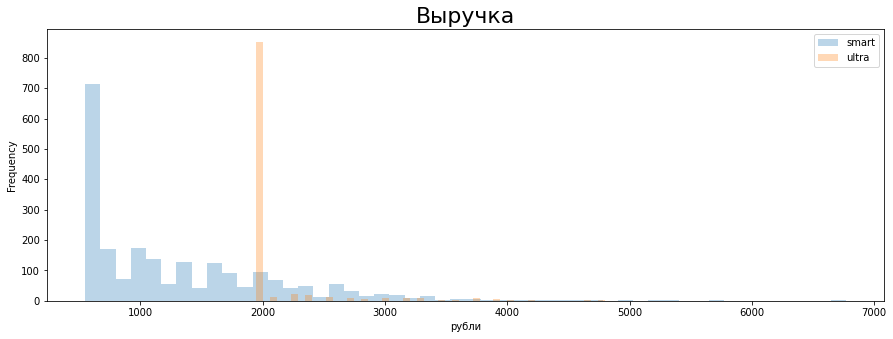

In [37]:
df.query('tariff == "smart"')['revenue'].plot(kind = 'hist', bins = 50, figsize=(15,5), alpha=0.3, legend = True,  label = 'smart') # строим гистограмму revenue тарифа smart 
df.query('tariff == "ultra"')['revenue'].plot(kind = 'hist', bins = 50, figsize=(15,5), alpha=0.3, legend = True, label = 'ultra') # строим гистограмму revenue тарифа ultra
plt.title('Выручка', fontsize=22) # задаём название графика
plt.xlabel('рубли') # задаём подпись горизонтальной оси
plt.show() # показываем график

### Вывод

Средний клиент с тарифом smart расходует 420 минуты разговора включены в тариф, 17 гигабайт интернет трафика превышает лимит на 2 гигабайта и 39 сообщение включены в тариф.
Средний клиент с тарифом ultra расходует 547 минут разговора включены в тариф, 20 гигабайт интернет трафика включены в тариф и 62 сообщения включены в тариф.

## Шаг 4. Проверка гипотез

1. Гипотеза средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

- Нулевая гипотеза: средняя выручка тарифов «Ультра» и «Смарт» равны.
- Альтернативная гипотеза: средняя выручка тарифов «Ультра» и «Смарт» разлтчаются.

In [38]:
alpha = 0.05 # задаём пороговое значение
results = st.ttest_ind(df.query('tariff == "smart"')['revenue'], df.query('tariff == "ultra"')['revenue']) # проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам 
print('p-значение: ', results.pvalue) # вывод на экран значения p-value
if results.pvalue < alpha: # сравниваем p-value с пороговым значением
    print('Отвергаем нулевую гипотезу') 
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  8.081909555489933e-161
Отвергаем нулевую гипотезу


2. Гипотеза средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

- Нулевая гипотеза: средняя выручка пользователей Москвы и других регионов равны.
- Альтернативная гипотеза: средняя выручка пользователей Москвы и других регионов разлтчаются.

In [39]:
results = st.ttest_ind(df.query('city == "Москва"')['revenue'], df.query('city != "Москва"')['revenue']) # проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
print('p-значение: ', results.pvalue) # вывод на экран значения p-value
if results.pvalue < alpha: # сравниваем p-value с пороговым значением
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


### Вывод

1. Мы отвергли нулевую гипотезу средняя выручка тарифов «Ультра» и «Смарт» равны, делаем вывод, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
2. Не получилось отвергнуть нулевую гипотезу средняя выручка пользователей Москвы и других регионов равны. Отвергаем гипотезу средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


## Шаг 5. Общий вывод

Тариф «Ультра» лучше чем тариф «Смарт». Средняя выручка у тарифа «Ультра» в 2.5 раза выше чем у тарифа «Смарт». Чтобы завлеч клиентов на тариф «Ультра» можно уменьшеть стоимость услуг сверх тарифного пакета. 

<hr style="border: 2px solid green;" />

## Шаг 6. Общий комментарий
Спасибо за проделанную работу🤝

Иван, проект выполнен достаточно хорошо, но ошибка при подготовке таблицы для основного анализа могла помешать корректным выводам. Найденные ошибки:
- изучить записи с нулевой длительностью или нулевым траффиком
- проверить корректность сборки общей таблицы
- по необходимости скорректировать выводы

Исправляй и отправляй на проверку🛠